<a href="https://colab.research.google.com/github/nicocarrion1/DiploDatos_AyV_G5/blob/main/Entregable_1_Ejercicio_2_V01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

<font color='orange'> 

**Grupo 5**: Nicolás Carrión, Génesis Núñez Sanchez, Magdalena Sella, Exequiel Santucho
</font>

###Ejercicio 2


# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




* Las columnas relevantes son (dos categóricas y tres numéricas): 
['profile_gender','profile_studies_level','salary_monthly_BRUTO','salary_monthly_NETO','profile_age']
* Se descartan las filas en donde no se cuenten con registros para las columnas relevantes.
* Como subpoblación, se eliminan valores extremos para el salario neto y/o bruto. Se usa el percentil 90 como valor máximo.


In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
data = pd.read_csv(url)

df = data # Copia del dataframe original para trabajar en él

In [ ]:
df.shape # 6095 filas
df[:5]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,Licenciatura en Sistemas,UNNE Universidad Nacional del Nordeste,"Sí, de forma particular, Sí, los pagó un emple...",Sí,Sí,SysAdmin / DevOps / SRE,"Docker, Linux, OpenStack, VMWare, Windows Server","Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","jQuery, WordPress","Microsoft SQL Server, MySQL",PHPUnit,"Eclipse, Visual Studio Code",GNU/Linux,Android,"Sí, pasiva",0.0,Bruto,Full-Time,130000.0,102000.0,NaN,3,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,Licenciatura en Ciencias dela Computación,UBA - Universidad de Buenos Aires,No,No,Sí,Developer,Amazon Web Services,"CSS, HTML, Javascript, SQL, TypeScript","Angular, Node.js","Amazon DynamoDB, MongoDB, MySQL",Jest,Vim,macOS,Android,No,0.0,Porcentaje de mi sueldo,Full-Time,140000.0,106000.0,NaN,1,1,Menos de un sueldo,Performance individual,No,0.0,0,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN


In [ ]:
#Selección de columnas interesantes: 2 variables categóricas y 3 numéricas
relevant_columns = ['profile_gender','profile_studies_level','salary_monthly_BRUTO','salary_monthly_NETO','profile_age']

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [ ]:
df.tools_programming_languages[:5]

0                                              Ninguno
1                             HTML, Javascript, Python
2                                              Ninguno
3    Bash/Shell, C, CSS, HTML, Java, Javascript, PH...
4               CSS, HTML, Javascript, SQL, TypeScript
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [ ]:
# Valores faltantes y subpoblación

# ---
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno', '')                     # Cambio 'ninguno de los anteriores' por 'ninguno', sino no elimina los registros
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:10]
# ---


# Subpoblación (Eliminación de valores faltantes y extremos)
df=df_lang

df.isna().sum()  # Total de valores faltantes por columnas
df = df.dropna(axis=0, subset=relevant_columns) # Descarto filas del df donde no tengo información para las columnas relevantes

salary_col='salary_monthly_BRUTO'
max_limit = float(df[salary_col].quantile([0.95])) # Descarto valores extremos en Salario Neto y/o Bruto
min_limit = float(df[salary_col].quantile([0.05]))
df = df.loc[(df[salary_col] < max_limit) & (df[salary_col] > min_limit)]
df.shape # 17051 filas
df[:10]

salary_col='salary_monthly_NETO'
max_limit = float(df[salary_col].quantile([0.95])) # Descarto valores extremos en Salario Neto y/o Bruto
min_limit = float(df[salary_col].quantile([0.05]))
df = df.loc[(df[salary_col] < max_limit) & (df[salary_col] > min_limit)]
df.shape # 15306 filas
df[:10]

,programming_language,profile_gender,profile_studies_level,salary_monthly_BRUTO,salary_monthly_NETO,profile_age,cured_programming_languages
1,html,Hombre,Universitario,79000.0,63000.0,29,"[html, javascript, python]"
1,javascript,Hombre,Universitario,79000.0,63000.0,29,"[html, javascript, python]"
1,python,Hombre,Universitario,79000.0,63000.0,29,"[html, javascript, python]"
3,bash/shell,Hombre,Posgrado,130000.0,102000.0,39,"[bash/shell, c, css, html, java, javascript, p..."
3,c,Hombre,Posgrado,130000.0,102000.0,39,"[bash/shell, c, css, html, java, javascript, p..."
3,css,Hombre,Posgrado,130000.0,102000.0,39,"[bash/shell, c, css, html, java, javascript, p..."
3,html,Hombre,Posgrado,130000.0,102000.0,39,"[bash/shell, c, css, html, java, javascript, p..."
3,java,Hombre,Posgrado,130000.0,102000.0,39,"[bash/shell, c, css, html, java, javascript, p..."
3,javascript,Hombre,Posgrado,130000.0,102000.0,39,"[bash/shell, c, css, html, java, javascript, p..."
3,php,Hombre,Posgrado,130000.0,102000.0,39,"[bash/shell, c, css, html, java, javascript, p..."


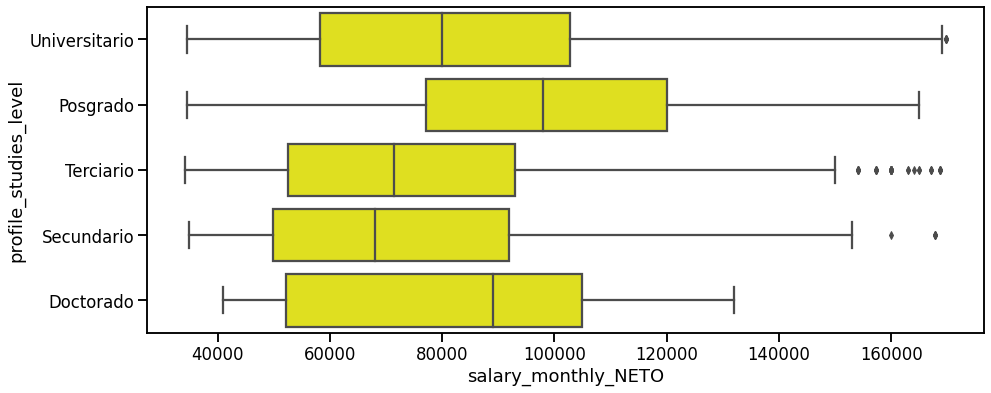

In [ ]:
# El Boxplot es una buena herramienta gráfica para comparar promedios: en este caso se grafican las variables Nivel de estudio vs Salario Neto. Como puede verse en el gráfico,
# las personas que poseen un Posgrado son los que, a priori, ganarían mejores salarios.
std = ['Terciario','Secundario','Universitario','Posgrado','Doctorado']
new = df[df.profile_studies_level.isin(std)]
plt.figure(figsize=(15, 6))
seaborn.boxplot(data=new, x='salary_monthly_NETO', y='profile_studies_level',
                color='yellow')
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
# En el gráfico de abajo, las variables que se muestran son el Nivel de Estudio vs Género. Este gráfico permite visualizar que los hombres con título universitario
# son la variable condicionada que aparece con más frecuencia en nuestro dataset, seguido de mujeres con título universitario.
pd.crosstab(new.profile_gender, new.profile_studies_level)#, normalize=True)

profile_studies_level,Doctorado,Posgrado,Secundario,Terciario,Universitario
profile_gender,,,,,
Hombre,45,566,912,2643,8969
Mujer,22,159,39,350,1477
Otros,3,5,3,13,55


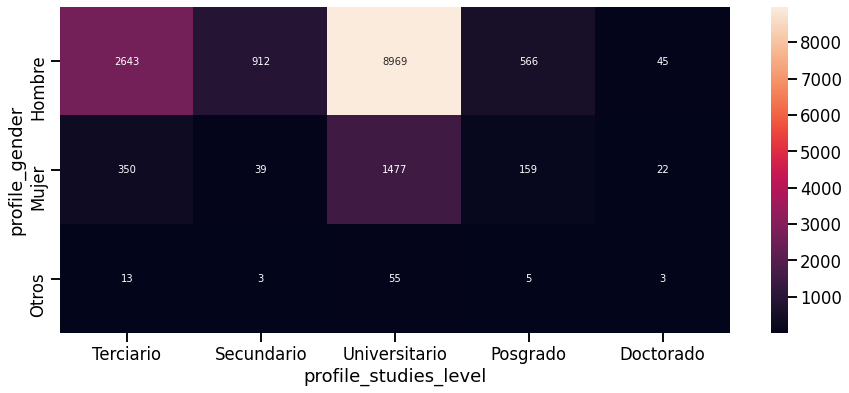

In [ ]:
fig = plt.figure(figsize=(15,6))
exp = pd.crosstab(new.profile_gender,
                  new.profile_studies_level)[std]
seaborn.heatmap(exp, annot=True, fmt='g')

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



Sería correcto medir la correlación entre las dos variables. Depende del objetivo de la encuesta. Si se quiere estudiar la formalidad del mercado laboral, o la presión del sistema previsional sobre los trabajadores y empleadores, el salario BRUTO sirve a estos fines. Si lo que se está intentado es encontrar si, en relación a otras profesiones los programadores ganan más que el resto, el salario NETO es una buena variable explicativa y comparable en cuanto a poder adquisitivo de los individuos.

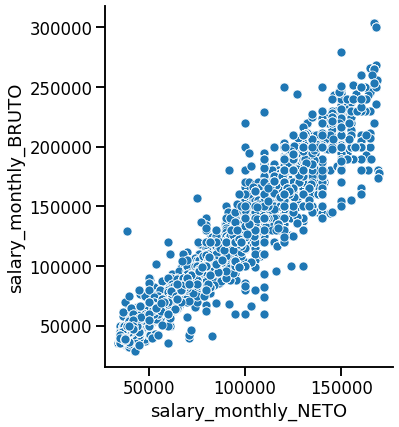

In [ ]:
# Se hace un gráfico de correlación
seaborn.pairplot(data=new,
                    x_vars=['salary_monthly_NETO'], y_vars=['salary_monthly_BRUTO'],
                 aspect=1, height=6)

# Se observa una correlación de tipo lineal

In [ ]:
correlation = np.corrcoef(new[salary_col],new['salary_monthly_BRUTO'])
correlation

array([[1.        , 0.96115839],
       [0.96115839, 1.        ]])

Existe una correlacion positiva entre el salario bruto y neto de 0.96. Por lo cual, se podría sacar el salario bruto y hacer realizar el análisis a partir del neto.

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






Media 1: 83224.57772688313 / Mediana 1: 80000.0 / Desv. Estándar 1: 30753.214502229974
Media 2: 76513.69684630733 / Mediana 2: 71400.0 / Desv. Estándar 2: 29884.390486888256


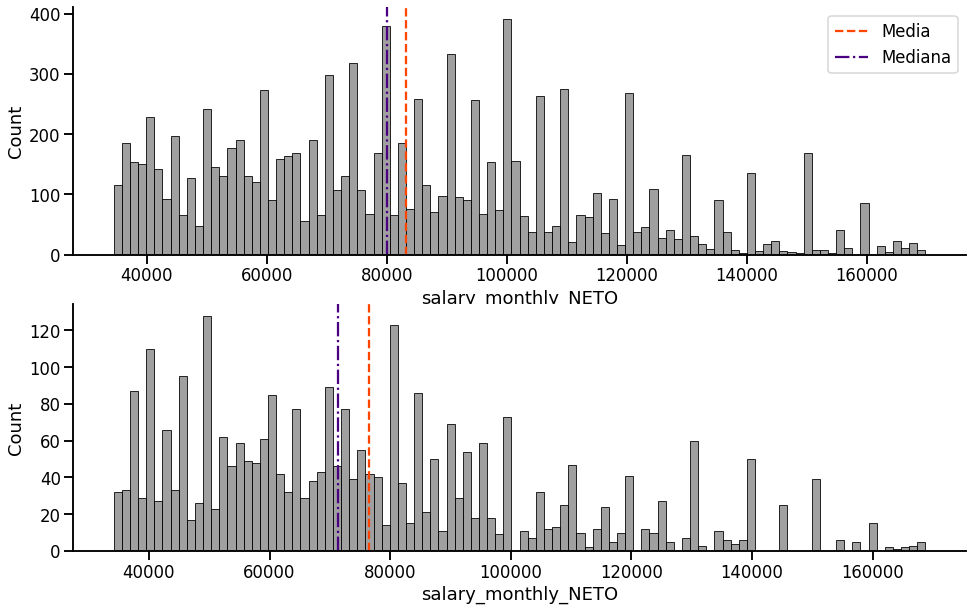

In [ ]:
poblacion_1 = ['Universitario']
new_1 = new[new.profile_studies_level.isin(poblacion_1)]

media_1 = new_1['salary_monthly_NETO'].mean()
mediana_1 = new_1['salary_monthly_NETO'].median()
std_1 = new_1['salary_monthly_NETO'].std()

poblacion_2 = ['Terciario']
new_2 = new[new.profile_studies_level.isin(poblacion_2)]

media_2 = new_2['salary_monthly_NETO'].mean()
mediana_2 = new_2['salary_monthly_NETO'].median()
std_2 = new_2['salary_monthly_NETO'].std()

print('Media 1: {} / Mediana 1: {} / Desv. Estándar 1: {}' .format(media_1, mediana_1, std_1))
print('Media 2: {} / Mediana 2: {} / Desv. Estándar 2: {}' .format(media_2, mediana_2, std_2))

# Histogramas
fig, axes = plt.subplots(nrows=2, figsize=(16, 10))
seaborn.histplot(new_1['salary_monthly_NETO'], bins=100, ax=axes[0], color='gray')
axes[0].axvline(media_1, color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(mediana_1, color='indigo',
            linestyle='-.', label='Mediana')

seaborn.histplot(new_2['salary_monthly_NETO'], bins=100, ax=axes[1], color='gray')
axes[1].axvline(media_2, color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(mediana_2, color='indigo',
            linestyle='-.', label='Mediana')

axes[0].legend()
seaborn.despine()

La subpoblación con nivel académico "Universitario" posee en promedio un salario neto más elevado que la subpoblación con nivel académico "Terciario". 

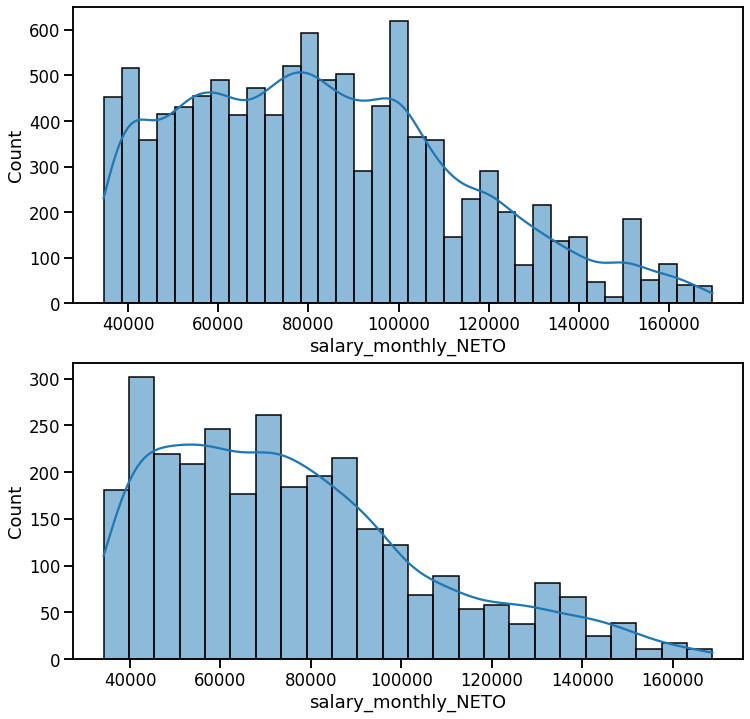

In [ ]:
new['profile_studies_level'].value_counts()

fig, axes = plt.subplots(figsize=(12, 12), nrows=2)
university_data=new[new['profile_studies_level']=='Universitario']
tertiary_data=new[new['profile_studies_level']=='Terciario']

seaborn.histplot(x=university_data['salary_monthly_NETO'],kde=True, ax=axes[0])
seaborn.histplot(x=tertiary_data['salary_monthly_NETO'], ax=axes[1],kde=True)

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


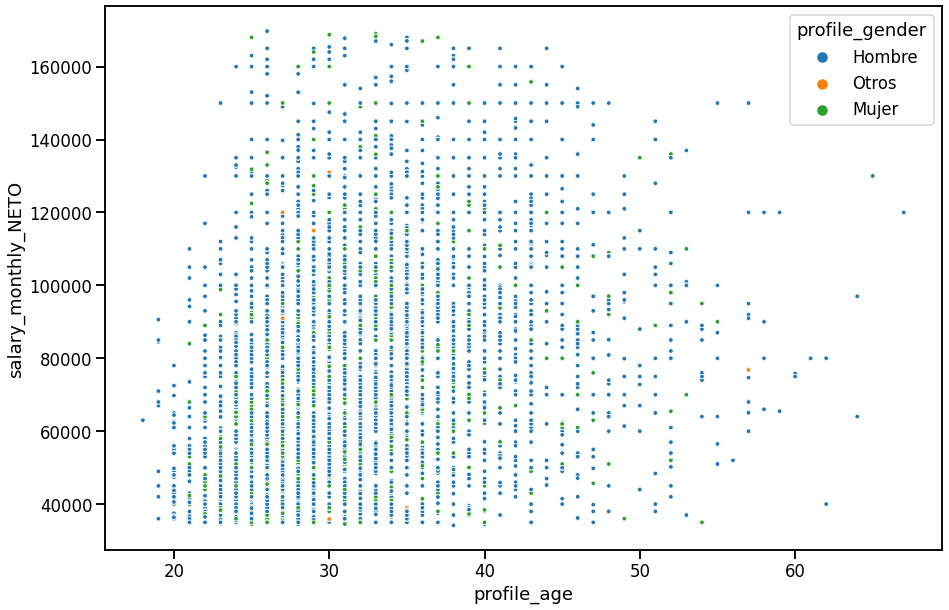

In [ ]:
new_3 = new.loc[new.profile_age < 100]

plt.figure(figsize=(15,10))
seaborn.scatterplot(data=new_3,
                    x='profile_age', y='salary_monthly_NETO',
                    marker='.',
                    hue='profile_gender')

La cantidad de puntos celestes en comparación con otros colores, indica que la mayor parte de los que completaron la encuesta se identifican con el género masculino. Por otro lado, se puede observar que la población está concentrada en personas que poseen menos de 50 años y cobran menos de $140 mil pesos por mes. 

En el gráfico anterior no puede distinguirse ningún patrón asociado a la identificación del género y las variables cuantitativas consideradas (salario mensual neto y edad).